In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
from numpy.random import multinomial

def bootstrap(series, n=1000, *args, **kwargs):
    return multinomial(series.sum(), series/series.sum(), n)

In [83]:
import numpy as np

from lint.models import Bucket

def plot_bootstrap(token, w=8, h=8):
    
    series = Bucket.token_series(token)
    
    expected = series.sum() / len(series)

    bs = bootstrap(np.full(len(series), expected))
    
    plt.figure(figsize=(w, h))

    plt.plot(bs.mean(0))

    plt.fill_between(
        range(100),
        bs.mean(0) + 2*bs.std(0),
        bs.mean(0) - 2*bs.std(0),
        color='black',
        alpha=0.1,
    )
    
    plt.plot(series)
    
    print(token)
    plt.show()

a


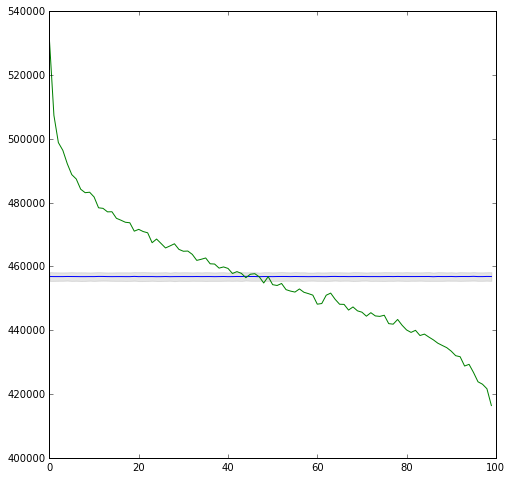

In [88]:
plot_bootstrap('a')

In [44]:
def zscores_series(token):
    
    series = Bucket.token_series(token)
    
    expected = series.sum() / len(series)

    bs = bootstrap(np.full(len(series), expected))
    
    return np.array([
        (observed-expected)/std
        for observed, std in zip(series, bs.std(0))
    ])

In [45]:
from joblib import Memory

from lint.models import Bucket

mem = Memory('cache')

token_counts = mem.cache(Bucket.token_counts)

tokens = token_counts(10000)

In [46]:
zscores = np.zeros((len(tokens), 100))

for i, token in enumerate(list(tokens.keys())[:500]):
    
    zscores[i] = zscores_series(token)
    
    if i%100 == 0:
        print(i)

0
100
200
300
400


In [35]:
for i in range(0, 100):
    print(i, list(tokens.keys())[zscores[:,i].argmax()])

0 chapter
1 of
2 of
3 a
4 a
5 a
6 a
7 a
8 a
9 a
10 a
11 a
12 a
13 a
14 a
15 a
16 a
17 a
18 a
19 a
20 a
21 a
22 a
23 a
24 a
25 a
26 a
27 a
28 miss
29 a
30 a
31 a
32 ’
33 miss
34 miss
35 miss
36 ’
37 “
38 “
39 “
40 “
41 “
42 “
43 “
44 “
45 “
46 “
47 ’
48 you
49 “
50 “
51 “
52 “
53 “
54 “
55 “
56 “
57 “
58 you
59 you
60 you
61 you
62 you
63 you
64 you
65 you
66 i
67 you
68 “
69 you
70 you
71 you
72 you
73 you
74 you
75 you
76 you
77 you
78 he
79 i
80 him
81 you
82 you
83 him
84 him
85 him
86 him
87 him
88 him
89 !
90 .
91 .
92 .
93 .
94 death
95 .
96 death
97 death
98 death
99 end


In [47]:
zscores[:,0].argsort()

array([  8,  15,   7, ...,   1,   5, 469])

In [90]:
for i in zscores[:,95].argsort()[::-1][:100]:
    print(list(tokens.keys())[i])

.
death
!
dead
god
him
me
!”
—
now
love
the
last
heart
again
life
saw
hand
my
cried
will
arms
then
fell
i
you
happy
forward
hands
through
came
back
body
toward
left
voice
had
knew
he
still
all
away
face
told
letter
stood
lay
come
arm
us
*
and
against
gone
tried
we
past
wife
your
moment
done
his
have
held
dear
to
from
hope
fire
into
has
slowly
reached
john
lost
once
could
behind
upon
shall
words
son
let
opened
heard
leave
sound
husband
feet
lips
her
turned
power
car
coming
it
where
sent
story
head
